# adv

Development of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} + \hat{h^ \prime} \ \text{SEF} - \hat{h^ \prime} \ \text{NetSW} + \textcolor{lightblue}{\hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}}$

<br />

Advection calculated as the residual

$\textcolor{lightblue}{\hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}} = \frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} - (\hat{h^ \prime} \ \text{NetLW} + \hat{h^ \prime} \ \text{SEF} + \hat{h^ \prime} \ \text{NetSW})$

In [1]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from funcs.vars.myPlots import *

In [10]:
from funcs.vars.myFuncs import *

In [2]:
model='MPI-ESM1-2-HR'
experiment_id='historical'

In [3]:
# mse
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
mse = ds.mse
mse_sMean = mse.mean(dim=('lat','lon'))
mse_anom = mse - mse_sMean
mse_anomSqrd = mse_anom**2
dmse = mse_anomSqrd.isel(time=slice(1,None)).data-mse_anomSqrd.isel(time=slice(0,-1)).data
dmse = xr.DataArray(
    data=dmse,
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anomSqrd.time.data[0:-1], 'lat': mse_anomSqrd.lat.data, 'lon': mse_anomSqrd.lon.data},
    attrs={'units':''}
    )

In [4]:
# LW
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netlw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netlw = ds.netlw
netlw_sMean = netlw.mean(dim=('lat','lon'))
netlw_anom = netlw - netlw_sMean
netlw_corr = mse_anom.data * netlw_anom.data
netlw_corr = xr.DataArray(
    data=netlw_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )


In [5]:
# SEF
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsef_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netsef = ds.netsef
netsef_sMean = netsef.mean(dim=('lat','lon'))
netsef_anom = netsef - netsef_sMean
netsef_corr = mse_anom.data * netsef_anom.data
netsef_corr = xr.DataArray(
    data=netsef_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

In [6]:
# SW
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netsw = ds.netsw
netsw_sMean = netsw.mean(dim=('lat','lon'))
netsw_anom = netsw - netsw_sMean
netsw_corr = mse_anom.data * netsw_anom.data
netsw_corr = xr.DataArray(
    data=netsw_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

In [7]:
print(np.shape(dmse))
print(np.shape(netlw_corr))
print(np.shape(netsw_corr))
print(np.shape(netsef_corr))

(10956, 64, 384)
(10956, 64, 384)
(10956, 64, 384)
(10956, 64, 384)


In [15]:
adv_corr = (netlw_corr + netsw_corr + netsef_corr) - dmse

In [16]:
adv_tMean = (adv_corr/mse_anom).mean(dim=('time'))

In [18]:
saveit=True
if saveit:
    folder = '/Users/cbla0002/Documents/data/cmip6/' + model
    fileName = model + '_adv_tMean_' + experiment_id + '.nc'
    dataset = xr.Dataset({'adv_tMean': adv_tMean})
    save_file(dataset, folder, fileName)

In [9]:
np.shape(adv)

(10956, 64, 384)

### snapshots

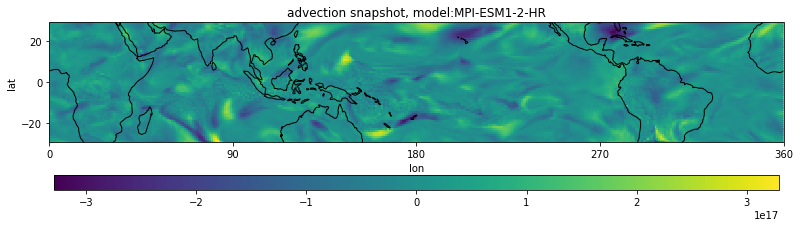

In [ ]:
plot_snapshot(adv.isel(time=0), 'viridis', 'advection', model)

In [ ]:
adv_mean = adv.mean(dim=('lat','lon'))
np.shape(adv_mean)

(10956,)

In [ ]:
adv_anom = adv - adv_mean
np.shape(adv_anom)

(10956, 64, 384)

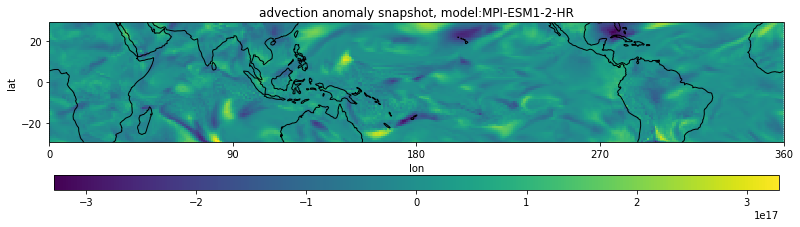

In [ ]:
plot_snapshot(adv_anom.isel(time=0), 'viridis', 'advection anomaly', model)

### $\hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

In [ ]:
adv_corr = mse_anom[0:-1].data * adv_anom.data
print(np.shape(adv_corr))

(10956, 64, 384)


In [ ]:
adv_corr = xr.DataArray(
    data=adv_corr,
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

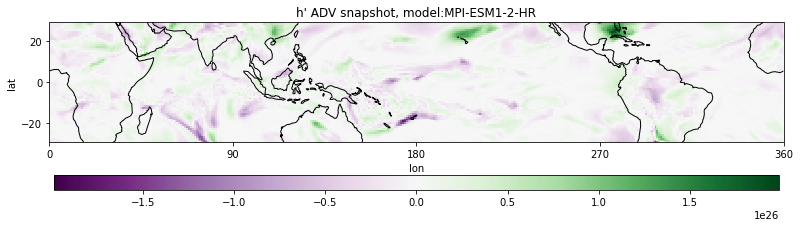

In [ ]:
plot_snapshot(adv_corr.isel(time=0), 'PRGn', 'h\' ADV', model)

In [ ]:
adv_corrsMean = adv_corr.mean(dim=('lat','lon'))

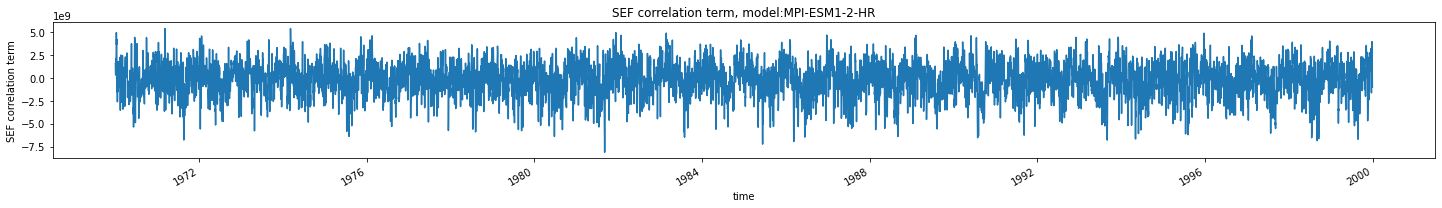

In [ ]:
plot_timeseries(netsef_corrsMean, 'ADV correlation term', model)